# Nearest Neighbor search : Python

La recherche du plus proche voisin a pour objectif, étant donné un point de "départ" et un ensemble de point, de trouver le voisin le plus proche du point de départ. Nous allons implémenter cette algorithme et ensuite l'étendre à un algorithme des k plus proches voisins (recherche des k voisins les plus proches plutôt que du seul voisin le plus proche).

Pour commencer, nous allons avoir besoin d'une fonction qui nous permettera de calculer la distance entre 2 points. Pour ce faire, utiliser la formule de la distance euclidienne. Elle est définie de la façon suivante : 

point1 = (x1,y1)
point2 = (x2,y2)
distance entre point 1 et point 2 = Racine carrée de (x1-x2)^2 + (y1-y2)^2

Pour calculer la racine carrée, vous pouvez utiliser :
- math.sqrt()
- (...)^(0.5)

In [32]:
#Time to code !
import math #permet d'importer la library nécessaire au calcul de la racine carrée

def calculate_distance(point1,point2):
    #Implémentez la formule de la distance euclidienne entre 2 point ici
    return math.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

L'algorithme du voisin le plus proche prend la forme suivante : 
1) Traversez chaque point.
2) Pour chaque point, calculez la distance entre le point et le point de départ.
3) Retournez les coordonnées du points le plus proche


In [33]:
#A vous de jouer

def nearest_neighbor(start, point_set):#start correspond au point de départ, point_set correspond à l'ensemble des points
    for i in range(len(point_set)):#on parcourt tout les point de l'ensemble
        
        if i == 0:
            min_distance = calculate_distance(start, point_set[0])
            nearest_nei = point_set[0]
            #La distance minimale n'étant pas définie, on doit l'initialiser à la première itération, c'est ce qu'on fait ici
            
        distance = calculate_distance(start, point_set[i])
        
        if distance < min_distance:            
            min_distance = calculate_distance(start, point_set[i])
            nearest_nei = point_set[i]   
            
        #Cette partie du code détermine si le point actuellement considéré, est plus proche du point de départ que les points 
        #parcouru jusqu'ici. Si c'est le cas, on redéfinit la distance minimale et "enregistre" les coordonées du point
        
    return nearest_nei, min_distance
        

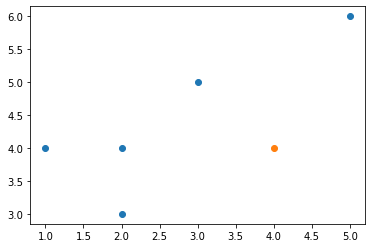

In [34]:
import matplotlib.pyplot as plt
point_set = [[2,3],[5,6],[1,4],[2,4],[3,5]]#L'ensemble de point (en bleu dans le graphe)
start = [4,4]#Point de départ(orange dans le graphe)

#Ne vous occupez pas de cette partie du code, elle permet de visualiser notre ensemble de point et le point de départ
plt.scatter([i[0] for i in point_set], [i[1] for i in point_set])
plt.scatter(start[0], start[1])

Quel est le point qui semble être le nearest neighbor ?

In [35]:
#Utilisons le code pour nous en assurer
point, distance = nearest_neighbor(start, point_set)
print("Le point le plus proche est {0} avec une distance de {1}".format(point, distance))

Le point le plus proche est [3, 5] avec une distance de 1.4142135623730951


Exercice facultatif :
Essayer d'utiliser votre algorithme du plus proche voisin, pour créer un algorithm des K plus proches voisins


In [36]:
def K_nearest_neighbor(start,point_set, K):
    temp = point_set #crée une copie de notre ensemble de point
    print(temp)
    k_nearest_nei = []
    
    for j in range(K):#A chaque itération on applique l'algorithme du nearest neighbour mais sur un ensemble de point réduit
        point, distance = nearest_neighbor(start,temp) 
        point.append(distance)
        k_nearest_nei.append(point)
        temp.remove(point)#On retire de l'ensemble de point le voisin le plus proche, de cette manière, à chaque itération,
        #le voisin le plus proche sera de plus en plus éloigné.
    
    return k_nearest_nei

In [37]:
K_nearest_neighbor(start, point_set, 2)

[[2, 3], [5, 6], [1, 4], [2, 4], [3, 5]]


[[3, 5, 1.4142135623730951], [2, 4, 2.0]]